<a href="https://colab.research.google.com/github/Jucavilav/CienciaDatosParcialDatos/blob/main/JuanAvila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pylev

In [4]:
import re
from random import randint
from seaborn import load_dataset
from datetime import datetime
from difflib import SequenceMatcher
import numpy as np
import pandas as pd
import pylev

In [5]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats

In [6]:
pd.set_option("display.max_columns", None)

In [7]:
stores_df = pd.read_csv("https://raw.githubusercontent.com/Jucavilav/CienciaDatosParcialDatos/main/stores.csv")
sales_df = pd.read_csv("https://raw.githubusercontent.com/Jucavilav/CienciaDatosParcialDatos/main/sales_history.csv")

<ipython-input-7-dc016f99d3ba>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_df = pd.read_csv("https://raw.githubusercontent.com/Jucavilav/CienciaDatosParcialDatos/main/sales_history.csv")


In [9]:
stores_df.shape
sales_df.shape

(373855, 9)

### ¿Qué tanto varían las ventas dependiendo del mes o del día de la semana?

In [10]:
sales_df.sample(5)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
189506,742,7,2014-06-15,0,0,0,0,0,0
371511,1002,5,2014-01-03,4536,624,1,0,0,1
125863,689,2,2014-08-19,7906,753,1,1,0,1
232210,1076,4,2014-05-08,3826,608,1,1,0,0
276525,791,6,2014-03-29,6075,676,1,0,0,0


In [11]:
sales_df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [13]:
# Seleccionar Columnas Deseadas
colum_deseadas = ["Store", "DayOfWeek", "Date", "Sales", "Customers"]

# Ahora, selecciona las columnas deseadas
df_sales = sales_df [colum_deseadas]

In [14]:
df_sales.head (5)

,Store,DayOfWeek,Date,Sales,Customers
0,1,3,2014-12-31,2605,327
1,2,3,2014-12-31,2269,252
2,3,3,2014-12-31,3804,408
3,4,3,2014-12-31,10152,1311
4,5,3,2014-12-31,1830,217


In [15]:
features = ["Sales", "Customers"]

<ipython-input-25-dd88ca2fd40c>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://raw.githubusercontent.com/Jucavilav/CienciaDatosParcialDatos/main/sales_history.csv")


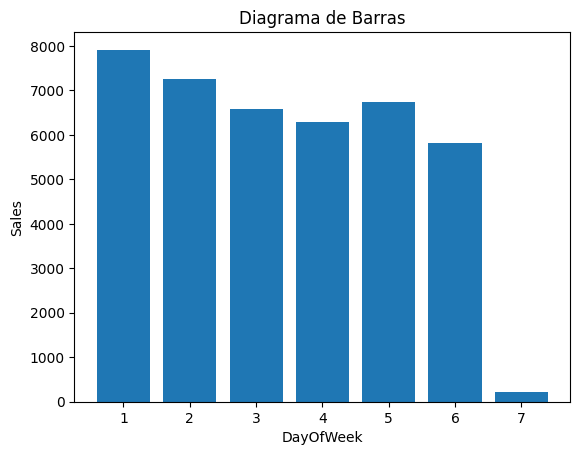

In [25]:
# Leer la base de datos
df = pd.read_csv("https://raw.githubusercontent.com/Jucavilav/CienciaDatosParcialDatos/main/sales_history.csv")

# Variables
variable_numerica = "Sales"
variable_categorica = "DayOfWeek"

# Agrupar y calcular la media de la variable numérica por categoría
agrupado = df.groupby(variable_categorica)[variable_numerica].mean()

# Crear el diagrama de barras
plt.bar(agrupado.index, agrupado.values)
plt.xlabel(variable_categorica)
plt.ylabel(variable_numerica)
plt.title("Diagrama de Barras")
plt.show()

<ipython-input-27-3567c67e9435>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://raw.githubusercontent.com/Jucavilav/CienciaDatosParcialDatos/main/sales_history.csv")


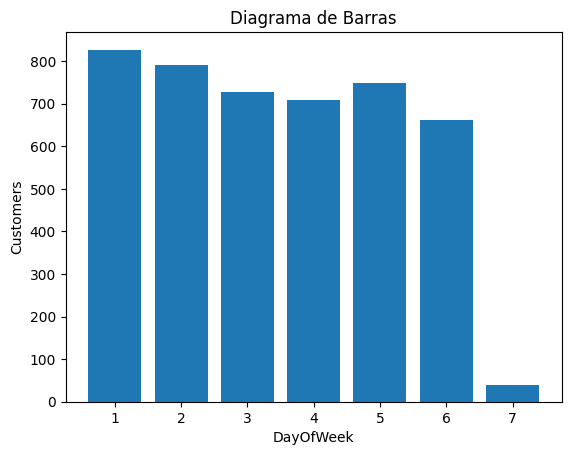

In [27]:
# Leer la base de datos
df = pd.read_csv("https://raw.githubusercontent.com/Jucavilav/CienciaDatosParcialDatos/main/sales_history.csv")

# Variables
variable_numerica = "Customers"
variable_categorica = "DayOfWeek"

# Agrupar y calcular la media de la variable numérica por categoría
agrupado = df.groupby(variable_categorica)[variable_numerica].mean()

# Crear el diagrama de barras
plt.bar(agrupado.index, agrupado.values)
plt.xlabel(variable_categorica)
plt.ylabel(variable_numerica)
plt.title("Diagrama de Barras")
plt.show()

Hay mayor afluencia y ventas y clientes las semanas 1, 2 y 5

### ¿Como del nivel de surtido de la sucursal?

In [73]:
import pandas as pd

# Cargar los dos DataFrames desde los archivos CSV
data1 = pd.read_csv("https://raw.githubusercontent.com/Jucavilav/CienciaDatosParcialDatos/main/stores.csv")
data2 = pd.read_csv("https://raw.githubusercontent.com/Jucavilav/CienciaDatosParcialDatos/main/sales_history.csv")

# Columnas de interés en data1 y data2
columna_busqueda = 'Store'
columna_resultado = 'Store'

# Valor que deseas buscar en data2
valor_a_buscar = 'Store'

# Realizar la operación tipo BUSCARV
resultado = data1[data1[columna_busqueda].isin(data2[data2['Store'] == valor_a_buscar])][[columna_busqueda, columna_resultado]]

# Mostrar el resultado
print(resultado)

Empty DataFrame
Columns: [Store, Store]
Index: []


<ipython-input-73-8f0068f82a54>:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv("https://raw.githubusercontent.com/Jucavilav/CienciaDatosParcialDatos/main/sales_history.csv")


In [75]:
import pandas as pd

# Cargar los dos DataFrames desde los archivos CSV
data1 = pd.read_csv("https://raw.githubusercontent.com/Jucavilav/CienciaDatosParcialDatos/main/stores.csv")
data2 = pd.read_csv("https://raw.githubusercontent.com/Jucavilav/CienciaDatosParcialDatos/main/sales_history.csv")

# Realizar un cruce (merge) en función de la columna en común
resultado = pd.merge(data1, data2, on='Store', how='inner')

# Mostrar el resultado
print(resultado)

        Store StoreType Assortment  CompetitionDistance  \
0           1         c          a               1270.0   
1           1         c          a               1270.0   
2           1         c          a               1270.0   
3           1         c          a               1270.0   
4           1         c          a               1270.0   
...       ...       ...        ...                  ...   
373850   1115         d          c               5350.0   
373851   1115         d          c               5350.0   
373852   1115         d          c               5350.0   
373853   1115         d          c               5350.0   
373854   1115         d          c               5350.0   

        CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                             9.0                    2008.0       0   
1                             9.0                    2008.0       0   
2                             9.0                    2008.0       0   
3      

<ipython-input-75-481fb63e4245>:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv("https://raw.githubusercontent.com/Jucavilav/CienciaDatosParcialDatos/main/sales_history.csv")


In [76]:
resultado.head (5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2014-12-31,2605,327,1,0,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2014-12-30,6466,703,1,0,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2014-12-29,6463,700,1,0,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,7,2014-12-28,0,0,0,0,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,6,2014-12-27,6057,684,1,0,0,1


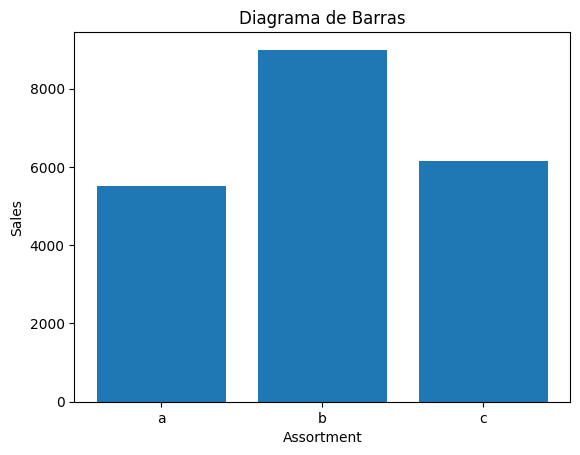

In [77]:
# Leer la base de datos
df = resultado

# Variables
variable_numerica = "Sales"
variable_categorica = "Assortment"

# Agrupar y calcular la media de la variable numérica por categoría
agrupado = df.groupby(variable_categorica)[variable_numerica].mean()

# Crear el diagrama de barras
plt.bar(agrupado.index, agrupado.values)
plt.xlabel(variable_categorica)
plt.ylabel(variable_numerica)
plt.title("Diagrama de Barras")
plt.show()

En donde hay mayor surtido son en las sucursales b, seguido de las c y por ultimo las a

### Adjunte un diagrama de bloques que evidencie los diferentes procesos de limpieza y preparación implementados

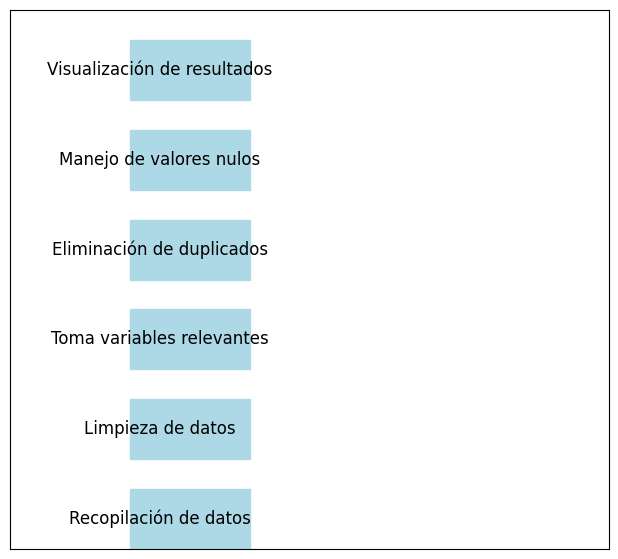

In [63]:
import matplotlib.pyplot as plt

# Define los procesos de limpieza y preparación de datos
procesos = [
    "Recopilación de datos",
    "Limpieza de datos",
    "Toma variables relevantes",
    "Eliminación de duplicados", #si aplica
    "Manejo de valores nulos", #si aplica
    "Visualización de resultados",
]

# Crea una figura y ejes
fig, ax = plt.subplots(figsize=(10, 7))

# Dibuja los bloques de proceso
block_width = 2
block_height = 1
for i, proceso in enumerate(procesos):
    x = 2
    y = i * (block_height + 0.5)
    ax.add_patch(plt.Rectangle((x, y), block_width, block_height, fill=True, color='lightblue'))
    plt.text(x + 0.5, y + 0.5, proceso, fontsize=12, va='center', ha='center')

# Configura la apariencia de la figura
ax.set_xlim(0, 10)
ax.set_ylim(0, len(procesos) * (block_height + 0.5))
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])

# Muestra el diagrama de bloques
plt.show()